In [1]:
# import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
version = 1488

results_path = f'sr_results/{version}.pkl'
reg = pickle.load(open(results_path, 'rb'))
# assert len(reg.equations_) == 2
# results = reg.equations_[0]  # equations for predicting the mean

In [3]:
type(reg.equations_)

list

In [4]:
reg.equations_

[    complexity      loss         score  \
 0            1  3.058837  0.000000e+00   
 1            3  2.852825  3.486256e-02   
 2            4  2.804055  1.724315e-02   
 3            5  2.439445  1.392960e-01   
 4            7  2.379621  1.241466e-02   
 5            8  2.242725  5.924959e-02   
 6            9  2.082375  7.418277e-02   
 7           10  2.079023  1.610613e-03   
 8           11  1.984665  4.644823e-02   
 9           12  1.984550  5.794597e-05   
 10          13  1.841346  7.489532e-02   
 11          14  1.841317  1.580378e-05   
 12          15  1.780132  3.379345e-02   
 13          17  1.741346  1.101443e-02   
 14          19  1.736851  1.292394e-03   
 15          20  1.736851  5.757545e-08   
 16          21  1.698042  2.259811e-02   
 17          23  1.680842  5.090483e-03   
 18          24  1.678747  1.246879e-03   
 19          25  1.664393  8.587188e-03   
 20          26  1.661702  1.618054e-03   
 21          27  1.659074  1.582883e-03   
 22        

In [13]:
[type(df['sympy_format'].iloc[0]) for df in reg.equations_]

[sympy.core.numbers.Float, sympy.core.numbers.Float]

In [14]:
results = reg.equations_

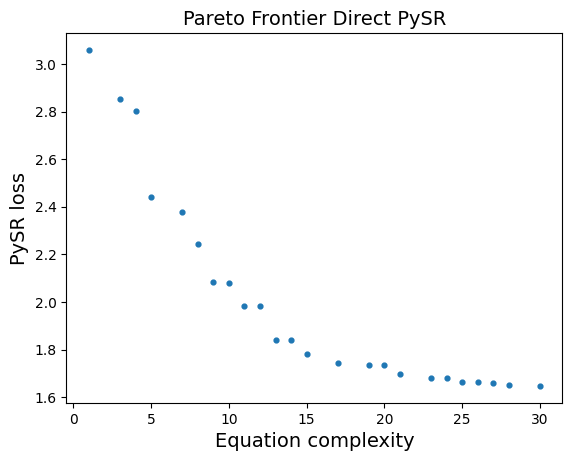

In [21]:
# plot the pareto curve for results
results = reg.equations_[0]  # Get first DataFrame from list
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y, s=12)
plt.xlabel('Equation complexity', fontsize=14)
plt.ylabel('PySR loss', fontsize=14)
plt.title(f'Pareto Frontier Direct PySR', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig(f'pareto_{version}.png')
plt.show()

In [16]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']

print(len(labels) - len(skipped))

31


In [17]:
mass_indices = [labels.index(f'm{i}') for i in range(1, 4)]
print(mass_indices)

[35, 36, 37]


In [18]:
# dont print columns 'sympy_format' and 'lambda_format'
results.drop(columns=['sympy_format', 'lambda_format'])

,complexity,loss,score,equation
0,1,3.058837,0.000000e+00,6.787548
1,3,2.852825,3.486256e-02,7.4305987 - s8
2,4,2.804055,1.724315e-02,6.955366 - sin(m19)
3,5,2.439445,1.392960e-01,(s14 ^ -0.3514014) - -3.3290584
4,7,2.379621,1.241466e-02,((s14 ^ -0.3209357) - -4.345556) - s8
5,8,2.242725,5.924959e-02,(4.3761067 + (s14 ^ -0.27230078)) - sin(m19)
6,9,2.082375,7.418277e-02,((s14 ^ -0.3514014) - -3.3290584) + (-0.351401...
7,10,2.079023,1.610613e-03,((s14 ^ -0.3514014) - -3.3290584) + sin(-0.351...
8,11,1.984665,4.644823e-02,((s14 ^ -0.34471112) - -4.345556) - ((1.563507...
9,12,1.984550,5.794597e-05,((s14 ^ -0.34471112) - -4.345556) - ((1.563507...


In [19]:
for i in range(len(results)):
    print(i, results['equation'][i])

0 6.787548
1 7.4305987 - s8
2 6.955366 - sin(m19)
3 (s14 ^ -0.3514014) - -3.3290584
4 ((s14 ^ -0.3209357) - -4.345556) - s8
5 (4.3761067 + (s14 ^ -0.27230078)) - sin(m19)
6 ((s14 ^ -0.3514014) - -3.3290584) + (-0.3514014 * m1)
7 ((s14 ^ -0.3514014) - -3.3290584) + sin(-0.3514014 * m1)
8 ((s14 ^ -0.34471112) - -4.345556) - ((1.5635078 ^ m1) + -0.34471112)
9 ((s14 ^ -0.34471112) - -4.345556) - ((1.5635078 ^ m1) + sin(-0.34471112))
10 (((s14 ^ -0.34471112) - -4.345556) - (1.8414203 ^ m1)) + (s0 ^ s7)
11 (((s14 ^ -0.34471112) - -4.345556) - (1.8414203 ^ m1)) + (sin(s0) ^ s7)
12 ((((s14 - (s7 * -0.055155993)) ^ -0.34471112) - -4.345556) - (1.8414203 ^ m1)) + 0.7271151
13 (((((s14 / 1.3696105) - (s7 * -0.055155993)) ^ -0.34471112) - -4.345556) - (1.8414203 ^ m1)) + 0.49913716
14 ((((((s14 / 1.2648404) - (s7 * -0.055155993)) ^ -0.34471112) - -4.345556) * 1.0672731) - (1.7942848 ^ m1)) - -0.040915616
15 ((((((s14 / 1.2648404) - (s7 * -0.055155993)) ^ -0.34471112) - -4.345556) * 1.0672731) - (1

In [20]:
# s = reg.latex_table(precision=2, indices=[[1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29], [ 1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29]], columns=['equation', 'complexity', 'loss'])
s = reg.latex_table(precision=2, columns=['equation', 'complexity', 'loss'])

# replace m_ with \\mu_ and s_ with \\sigma_
s = s.replace('m_', '\\mu_')
s = s.replace('s_', '\\sigma_')

# remove the first 5 lines which are package imports
s = '\n'.join(s.split('\n')[5:])
print(s)

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}ccc@{}}
\toprule
Equation & Complexity & Loss \\
\midrule
$y_{0} = 6.8$ & $1$ & $3.1$ \\
$y_{0} = 7.4 - \sigma_{8}$ & $3$ & $2.9$ \\
$y_{0} = 7.0 - \sin{\left(\mu_{19} \right)}$ & $4$ & $2.8$ \\
$y_{0} = \sigma_{14}^{-0.35} + 3.3$ & $5$ & $2.4$ \\
$y_{0} = \sigma_{14}^{-0.32} - \sigma_{8} + 4.3$ & $7$ & $2.4$ \\
$y_{0} = \sigma_{14}^{-0.27} - \sin{\left(\mu_{19} \right)} + 4.4$ & $8$ & $2.2$ \\
$y_{0} = - 0.35 \mu_{1} + \sigma_{14}^{-0.35} + 3.3$ & $9$ & $2.1$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \sigma_{14}^{-0.35} - \sin{\left(0.35 \mu_{1} \right)} + 3.3 \end{dmath*} \end{minipage} & $10$ & $2.1$ \\
$y_{0} = - {1.6}^{\mu_{1}} + \sigma_{14}^{-0.34} + 4.7$ & $11$ & $2.0$ \\
$y_{0} = - {1.6}^{\mu_{1}} + \sigma_{14}^{-0.34} + 4.7$ & $12$ & $2.0$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = - {1.8}^{\mu_{1}} + \sigma_{0}^{\sigma_{7}} + \sigma_{14}^{-0.34} + 4.3 \end{dmath*} \en